## **Cleaning our data and analyzing it**



In [9]:
# Import modules
import numpy as np
import pandas as pd

# Open the .csv file
data = pd.read_csv('zillow_listings.csv', low_memory=False)
pd.set_option('display.max_columns', None)
data.head(5)

,zpid,streetAddress,zipcode,city,state,latitude,longitude,price,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,daysOnZillow,isFeatured,shouldHighlight,zestimate,rentZestimate,listing_sub_type,isUnmappable,isPreforeclosureAuction,homeStatusForHDP,priceForHDP,isNonOwnerOccupied,isPremierBuilder,isZillowOwned,currency,country,taxAssessedValue,lotAreaValue,lotAreaUnit,unit,isRentalWithBasePrice,datePriceChanged,priceReduction,priceChange,videoCount,providerListingID,newConstructionType,contingentListingType,openHouse,open_house_info,comingSoonOnMarketDate
0,16765112,2330 Via Aprilia,92014,Del Mar,CA,32.934574,-117.251900,8500.0,1.680246e+12,4.0,3.0,2899.0,SINGLE_FAMILY,RECENTLY_SOLD,-1,False,False,2759800.0,9650.0,NaN,False,False,RECENTLY_SOLD,8500.0,True,False,False,USD,USA,1340151.0,7840.00,sqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16731749,16938 Via De Santa Fe,92091,Rancho Santa Fe,CA,33.018356,-117.201935,6499.0,1.677917e+12,2.0,2.0,1530.0,CONDO,RECENTLY_SOLD,-1,False,False,1359200.0,3898.0,NaN,False,False,RECENTLY_SOLD,6499.0,True,False,False,USD,USA,557001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82941077,260 E Bradley Ave SPACE 29,92021,El cajon,CA,32.821266,-116.958670,20000.0,1.677139e+12,1.0,2.0,800.0,MANUFACTURED,RECENTLY_SOLD,-1,False,False,NaN,2281.0,NaN,False,False,RECENTLY_SOLD,20000.0,True,False,False,USD,USA,24248.0,2.78,acres,Space 29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61238050,220 Lyon Cir,92083,Vista,CA,33.192005,-117.238144,3895.0,1.676880e+12,2.5,3.0,1903.0,SINGLE_FAMILY,RECENTLY_SOLD,-1,False,False,828800.0,3792.0,NaN,False,False,RECENTLY_SOLD,3895.0,True,False,False,USD,USA,569249.0,9741.00,sqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16875584,9356 Las Lomas Dr,92071,Santee,CA,32.863760,-117.001550,1000.0,1.675843e+12,2.0,3.0,1676.0,SINGLE_FAMILY,RECENTLY_SOLD,-1,False,False,893100.0,3800.0,NaN,False,False,RECENTLY_SOLD,1000.0,True,False,False,USD,USA,795000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since a lot of the information found in the dataset is related to Zillow's internal data, we can reduce the number of variables to the ones that we care about and that we can use to build our model. By analyzing the dataset, we concluded that only 6.3% of our listings contained missing values in the important variables, and dropping them would not make a very significant difference in our dataset, so we drop the samples with missing values.

In [108]:
# Select only the important variables and drop listings with missing values
cols = [
    'price',
    'bedrooms',
    'bathrooms',
    'zipcode',
    'latitude',
    'longitude',
    'livingArea',
    'homeType',
    'city'
]
df = data[cols].dropna().reset_index(drop=True)
df.head(5)

,price,bedrooms,bathrooms,zipcode,latitude,longitude,livingArea,homeType,city
0,8500.0,3.0,4.0,92014,32.934574,-117.251900,2899.0,SINGLE_FAMILY,Del Mar
1,6499.0,2.0,2.0,92091,33.018356,-117.201935,1530.0,CONDO,Rancho Santa Fe
2,20000.0,2.0,1.0,92021,32.821266,-116.958670,800.0,MANUFACTURED,El cajon
3,3895.0,3.0,2.5,92083,33.192005,-117.238144,1903.0,SINGLE_FAMILY,Vista
4,1000.0,3.0,2.0,92071,32.863760,-117.001550,1676.0,SINGLE_FAMILY,Santee


We can now view some general information of the dataset. From the pandas .info method, we can tell that the dataset is now reduced to 25023 entries with no missing values, containing 8 predictor variables and a target variable (price).

In [109]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25023 entries, 0 to 25022
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       25023 non-null  float64
 1   bedrooms    25023 non-null  float64
 2   bathrooms   25023 non-null  float64
 3   zipcode     25023 non-null  int64  
 4   latitude    25023 non-null  float64
 5   longitude   25023 non-null  float64
 6   livingArea  25023 non-null  float64
 7   homeType    25023 non-null  object 
 8   city        25023 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.7+ MB


Looking at the general statistics of the numerical variables of our model, we can see that there need to be a data cleaning process, since we have impossible variables (0 bedrooms/bathrooms/living area and an impossibly high number of bedrooms and bathrooms).

In [110]:
# General statistics about the dataset
df.describe()

,price,bedrooms,bathrooms,zipcode,latitude,longitude,livingArea
count,2.502300e+04,25023.000000,25023.000000,25023.000000,25023.000000,25023.000000,25023.000000
mean,1.052427e+06,3.316189,2.514387,92058.341126,32.894462,-117.126687,1721.322823
std,9.396863e+05,27.322629,9.150478,65.891742,0.193018,0.114507,989.863038
min,5.000000e+02,0.000000,0.000000,91902.000000,32.544020,-117.391190,0.000000
25%,6.100000e+05,2.000000,2.000000,92021.000000,32.744608,-117.223620,1118.000000
50%,8.100000e+05,3.000000,2.000000,92071.000000,32.834576,-117.120970,1481.000000
75%,1.170000e+06,4.000000,3.000000,92114.000000,33.083299,-117.042985,2021.000000
max,2.000000e+07,3705.000000,1440.000000,92620.000000,33.277138,-116.836550,15649.000000


We clean the dataset by removing impossible values and outliers, like prices below $100,000 and above $5,000,000, since there are very few listings these prices and most of them are explained by errors in reported pricing and do not correspond to the actual sale price. We also need to shuffle our data, since the method used to obtain it was based on price, and the data index is sorted by price range because of this.

In [113]:
# Cleaning the data by removing outliers and values with errors
df = df[(df['bedrooms'] > 0) & (df['bedrooms'] < 15) & (df['bathrooms'] > 0) & (df['bathrooms'] < 15) & (df['livingArea'] > 1000) & (df['livingArea'] < 8000) & (df['price'] > 100000) & (df['price'] < 5000000)]
df = df.sample(frac = 1).reset_index(drop=True)

We can now move over to visualizing the patterns in our data. By plotting the distribution of the price, we can tell that it is skewed towards cheaper prices. Most of the listings were sold at around $500,000 - $700,000, with values higher than $3,000,000 being pretty rare.

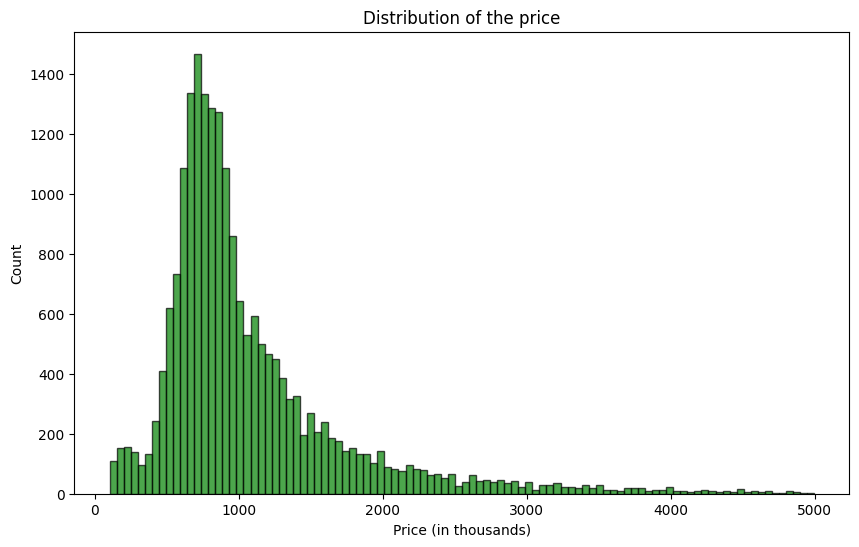

In [114]:
# Plot the distribution of the price
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['price']/1000, bins=100, color = 'green', edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of the price')
plt.xlabel('Price (in thousands)')
plt.ylabel('Count')
plt.show()

Visualizing the number of bedrooms against price, there is not a very clear pattern, but even though the variance between prices is pretty high, there are not a lot of cheap homes with a large number of bedrooms, or expensive homes with a low number of bedrooms, which leads to believe that there is some sort of linear relationship, even if they are not that correlated.

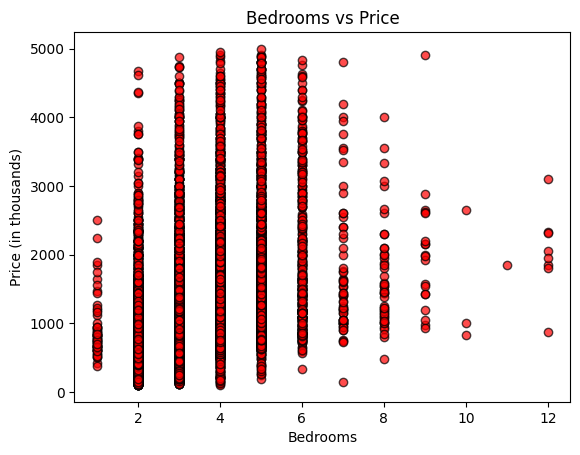

In [132]:
# Plot bedrooms against price
plt.figure()
plt.scatter(df['bedrooms'], df['price']/1000, color = 'red', alpha = 0.7)
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price (in thousands)')
plt.show()

The number of bathrooms exhibits a similar relationship to the price than the bedrooms, in the sense that the linear relationship is not crystal clear, but we can tell that there is one. The relationship in this case is a little bit more notable, and we will confirm this further on.

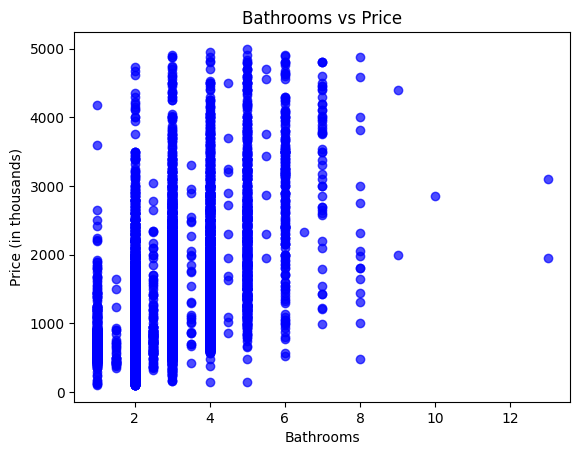

In [116]:
# Plot bathrooms against price
plt.figure()
plt.scatter(df['bathrooms'], df['price']/1000, color = 'blue', alpha = 0.7)
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price (in thousands)')
plt.show()

Finally, we plot the living area in square feet against the price. There is a lot of variance in the data, but there is a clear linear pattern that correlates these two variables.

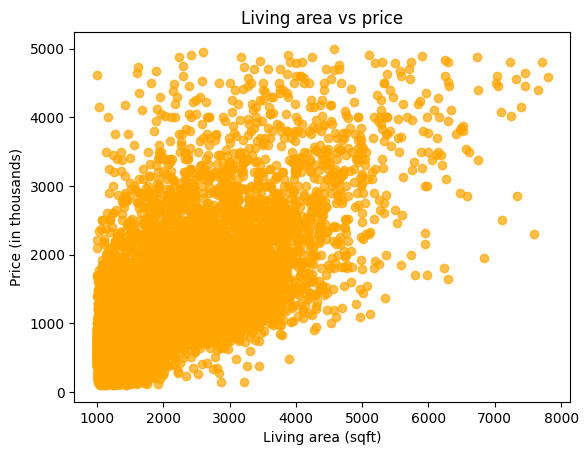

In [133]:
# Plot living area against price
plt.figure()
plt.scatter(df['livingArea'], df['price']/1000, color = 'orange', alpha = 0.7)
plt.title('Living area vs price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (in thousands)')
plt.show()

In order to confirm what the visualizations told us, we can calculate the Pearson correlation of every variable against the data. Even if the correlation is not super high, there is a pattern in the living area, bathrooms and bedrooms. The zipcode variable is categorical even if it contains numerical data, so it is not useful in the correlation analysis, and we can also tell that the longitude variable is negatively correlated with the price, while the latitude variable is not.
This makes sense, since more negative values in latitude correspond to houses that are located more to the west than other houses, and that means that these houses are closer to the Pacific Ocean, which increases the price since coastal view is a very important factor in real estate pricing.

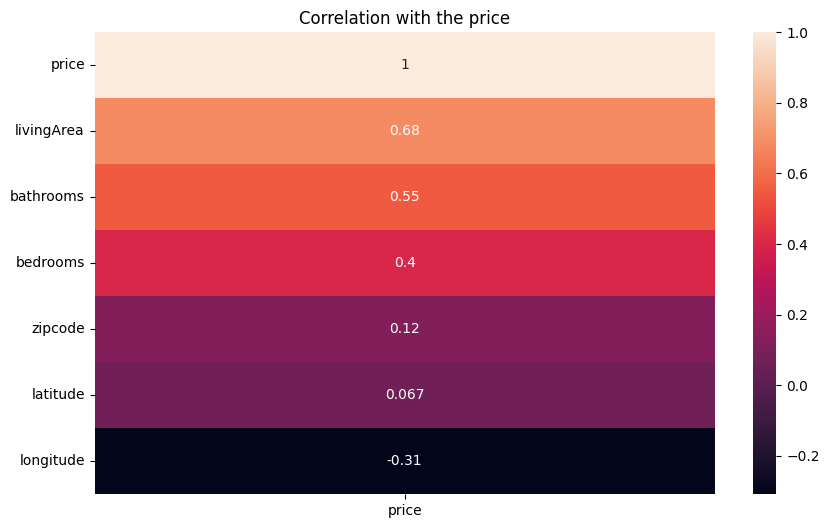

In [134]:
# Plot the correlation with the price only
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), annot=True)
plt.title('Correlation with the price')
plt.show()

Now, we can move over to analyzing and cleaning our categorical variables. The homeType variable contains the category of the listing, like if it is a condominium, a mobile home or a regular single family home. 

In [54]:
# Visualize the distribution of the home types
df['homeType'].value_counts()

SINGLE_FAMILY    13969
CONDO             3316
TOWNHOUSE         1796
MANUFACTURED       840
MULTI_FAMILY       412
APARTMENT          186
LOT                  1
Name: homeType, dtype: int64

The townhouse and multifamily categories describe similar house types, so we can combine them into a single category, and since there is only one lot listing, we can remove it to reduce the number of categories from 7 to 5.

In [119]:
# Combine multi-family and townhouse into one category (they are similar)
df['homeType'] = df['homeType'].replace(['MULTI_FAMILY', 'TOWNHOUSE'], 'TOWNHOUSE')

# Remove the only lot listing
df = df[df['homeType'] != 'LOT']

Now, we observe the city variable. There are 27 valid cities in the San Diego County, and the other categories correspond to typos and other external factors. We will remove these listings since there are only a few of them.

In [56]:
# Visualize the distribution of cities
df['city'].value_counts()

San Diego             7555
Oceanside             1638
Chula Vista           1562
Escondido             1304
Carlsbad              1113
El Cajon              1045
San Marcos             887
Vista                  819
Santee                 610
Spring Valley          539
La Mesa                529
La Jolla               416
Poway                  410
Lakeside               401
Encinitas              375
Coronado               172
Lemon Grove            166
National City          158
Rancho Santa Fe        134
Imperial Beach         128
Solana Beach           122
Bonita                 106
Del Mar                105
Cardiff                 73
Jamul                   56
Ramona                  40
San Ysidro              21
San marcos               5
Chula vista              4
Cardiff By The Sea       3
Bonsall                  3
El cajon                 3
San diego                2
RANCHO SANTA FE          2
Costa Mesa               1
La Costa                 1
SANTEE                   1
J

In [120]:
# Define important cities to be included in the analysis with correct spelling
cities = ['San Diego',
 'Oceanside',
 'Chula Vista',
 'Escondido',
 'El Cajon',
 'Carlsbad',
 'San Marcos',
 'Vista',
 'Santee',
 'La Mesa',
 'Spring Valley',
 'La Jolla',
 'Lakeside',
 'Encinitas',
 'Poway',
 'Coronado',
 'Rancho Santa Fe',
 'National City',
 'Lemon Grove',
 'Imperial Beach',
 'Del Mar',
 'Solana Beach',
 'Bonita',
 'Cardiff',
 'Jamul',
 'Ramona',
 'San Ysidro']

# Remove alternate cities
df = df[df['city'].isin(cities)]

The San Diego city corresponds to a very big area of the county, and it would be interesting to break it up into smaller sections so that our model can identify the patterns in each area. We associate each zipcode inside the San Diego city to a smaller, closer city, or create new areas, like Downtown San Diego. Then, we change the city from San Diego to our new San Diego area and drop the zip code variable, since it is already included in the more general city variable.

In [122]:
# Expand the 'San Diego' city to include neighborhoods and close cities based on zip codes
city_dict = {92101: 'Downtown',
            92128: 'Poway', 
            92117: 'Clairemont', 
            92115: 'La Mesa',
            92130: 'Del Mar', 
            92154: 'San Ysidro',
            92126: 'Poway', 
            92109: 'Point Loma', 
            92114: 'National City', 
            92103: 'Downtown',
            92129: 'Poway', 
            92120: 'La Mesa',
            92131: 'Poway',
            92111: 'Clairemont',
            92104: 'Downtown',
            92108: 'Mission Valley', 
            92122: 'Clairemont',
            92119: 'La Mesa',
            92116: 'Mission Valley',
            92105: 'Downtown', 
            92110: 'Point Loma', 
            92123: 'Mission Valley',
            92139: 'National City',
            92124: 'Mission Valley', 
            92107: 'Point Loma', 
            92102: 'Downtown', 
            92106: 'Point Loma',
            92113: 'Downtown',
            92121: 'Clairemont', 
            92173: 'San Ysidro', 
            92118: 'Coronado',
            92127: 'Rancho Santa Fe'} 

# Change city depending on zip code and drop it
df['city'] = df['zipcode'].map(city_dict).fillna(df['city'])
df.drop('zipcode', axis=1, inplace=True)

Now, we can plot all of our listings by price and show them alongside a map of San Diego County to visualize patterns in the house prices. There are 3 areas that are clearly more expensive than other ones, corresponding to the La Jolla, Rancho Santa Fe and Coronado areas, which are commonly known as more expensive areas. 

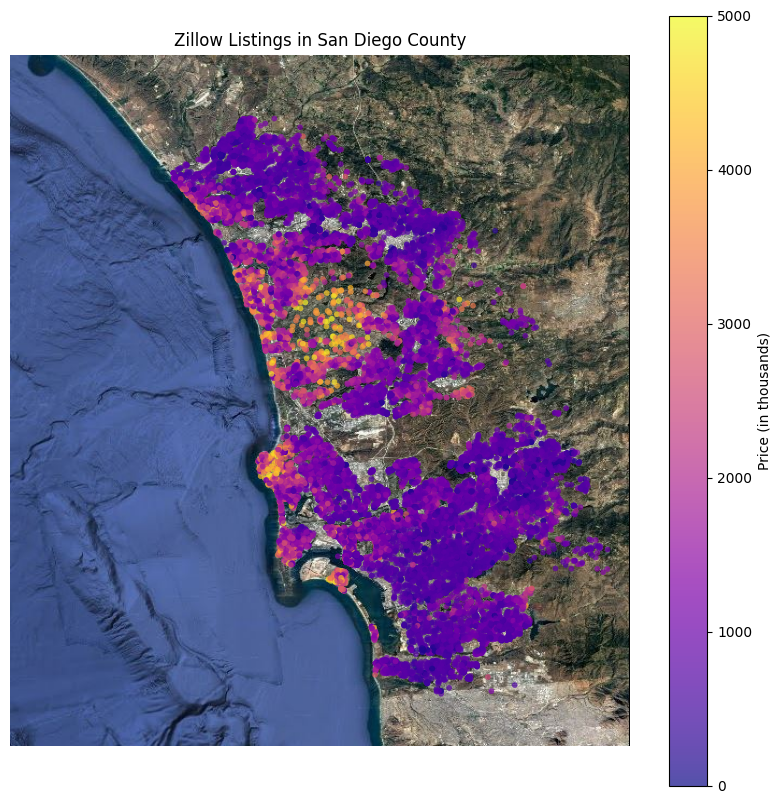

In [123]:
# Graph listings on map
plt.figure(figsize=(10,10))
plt.scatter(df['longitude'], df['latitude'], c=df['price']/1000, cmap='plasma', alpha=0.7, edgecolors='none', s = 17)
plt.colorbar().set_label('Price (in thousands)')
plt.clim(0, 5000)
plt.title('Zillow Listings in San Diego County')
plt.xlim(-117.5976, -116.8080)
plt.ylim(32.477, 33.358)
plt.axis('off')

# Add map image
import PIL as Image
map_image = plt.imread('san_diego.JPG')    
plt.imshow(map_image, extent=[-117.5976, -116.8080, 32.477, 33.358])
plt.show()

Now that our dataset is cleaned and we extracted interesting information from it, we can move forward to modelling our data using machine learning to predict house prices.